In [6]:
import pandas as pd
import matplotlib

# источник данных можно заменить на https://raw.githubusercontent.com/xevb3k/urls_with_source/main/data/urls_with_source.csv
data = pd.read_csv('data/urls_with_source.csv', sep=',')
# убираем наносекунды, выделяем дату (уникальный день) и время (без секунд) в отдельные столбцы для дальнейшей работы
data['created'] = data['created'].astype('str').apply(lambda t: t.split('.')[0])
data['created'] = pd.to_datetime(data['created'], dayfirst=True)
data['day'] = data['created'].dt.date
data['minute'] = data['created'].dt.time
data['minute'] = data['minute'].apply(lambda t: t.strftime('%H:%M'))
display(data.head())

,id,created,source,day,minute
0,120051923,2022-03-01 00:02:11,69489,2022-03-01,00:02
1,120051932,2022-03-01 00:02:15,69489,2022-03-01,00:02
2,120051947,2022-03-01 00:02:20,69489,2022-03-01,00:02
3,120051987,2022-03-01 00:02:26,69489,2022-03-01,00:02
4,120051995,2022-03-01 00:02:26,69489,2022-03-01,00:02


Задание 1.
Постройте процентное распределение источников, откуда пришли урлы. Сколько имеется источников, из которых пришло менее 1% урлов?

In [7]:
print('Процентное распределение источников URL:')
# считаем долю каждого источника
src_distrib = data['source'].value_counts(normalize=True).to_frame(name='%').apply(lambda row: row*100)
mask = src_distrib['%'] < 1
src_min_count = src_distrib[mask].shape[0]
print(f'Из {src_min_count} источников пришло менее 1% URL')
display(src_distrib)

Процентное распределение источников URL:
Из 18 источников пришло менее 1% URL


,%
69489,47.300609
3e3a6,27.911367
fb42b,9.876789
74a01,5.468336
8ff46,4.915209
1ca99,1.271860
cded6,1.122814
1bc3c,0.748543
2473a,0.592872
33d69,0.370959


Задание 2.
Постройте сводную (pivot) таблицу с распределением количества пришедших ссылок за каждый день

In [8]:
# сводная таблица - количество url за каждый уникальный день
piv = pd.pivot_table(data,
                     values = 'id',
                     index = 'day',                     
                     aggfunc='count')
print('Количество пришедших ссылок за каждый день:')
display(piv)

Количество пришедших ссылок за каждый день:


,id
day,
2022-03-01,598
2022-03-02,1054
2022-03-03,1816
2022-03-04,1490
2022-03-05,1983
2022-03-06,313
2022-03-07,837
2022-03-08,731
2022-03-09,1209


Задание 3.
Постройте график зависимости количества пришедших урлов от времени суток с точностью до минуты (т.е. сколько ссылок пришло за все дни в 00:01, 00:02 и т.д.)

02:02    363
07:59    334
04:51    318
01:52    309
01:32    270
        ... 
12:24      1
10:23      1
03:17      1
11:17      1
02:07      1
Name: minute, Length: 1334, dtype: int64

<AxesSubplot: title={'center': 'График зависимости количества пришедших урлов от времени суток с точностью до минуты:'}, xlabel='minute'>

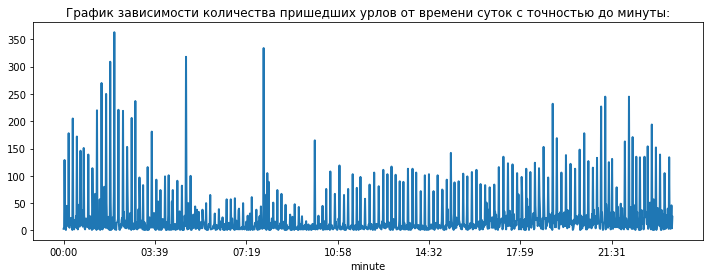

In [9]:
display(data['minute'].value_counts())
grouped_cases = data.groupby('minute')['id'].count()
grouped_cases.plot(
    kind = 'line',
    figsize = (12,4),
    title = 'График зависимости количества пришедших урлов от времени суток с точностью до минуты:',
    lw = 2
)